In [37]:
#import imp library 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split ,GridSearchCV 
from sklearn.metrics import r2_score,mean_absolute_error,confusion_matrix,classification_report,accuracy_score,precision_score
import statsmodels as sm
import matplotlib.pyplot as plt
import scikitplot as skplt
from matplotlib import pyplot
from collections import Counter
import warnings
import math
warnings.filterwarnings('ignore')

In [38]:
#read csv file and see top data overview to attemp classification problem first then will go for regression
power=pd.read_csv(r"C:\Users\INPshy\Desktop\DATA Science\database_IND.csv")
power.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


So many NAN value in many coulmn 

In [39]:
power.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [40]:
print(power.shape,power.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

so total 908 rows and 25 column and many column have missing values ,if missing data more than 80% in a column  better to drop

In [41]:
power.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [42]:
#drop NAN columnwhich have more than 80% value is missing
data=power.drop(columns=['estimated_generation_gwh','wepp_id','other_fuel3','other_fuel2','other_fuel1'],axis=1)

In [43]:
data.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,NaN,NaN,0.994875,233.59665,865.4,Central Electricity Authority
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,iEnergy Wind Farms,CDM,https://cdm.unfccc.int/Projects/DB/RWTUV134503...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
data.shape #so now 20 column including target variable earlier it was 25 column

(908, 20)

In [45]:
#so now first treat all nan values 
data['latitude']=data['latitude'].fillna(data['latitude'].mean())
data['longitude']=data['longitude'].fillna(data['longitude'].mean())
data['commissioning_year']=data['commissioning_year'].fillna(data['commissioning_year'].mode()[0])
data['owner']=data['owner'].fillna(data['owner'].mode()[0])
data['geolocation_source']=data['geolocation_source'].fillna(data['geolocation_source'].mode()[0])
data['year_of_capacity_data']=data['year_of_capacity_data'].fillna(data['year_of_capacity_data'].mode()[0])
data['generation_gwh_2013']=data['generation_gwh_2013'].fillna(data['generation_gwh_2013'].mean())
data['generation_gwh_2014']=data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].mean())
data['generation_gwh_2015']=data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].mean())
data['generation_gwh_2016']=data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].mean())
data['generation_gwh_2017']=data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].mean())
data['generation_data_source']=data['generation_data_source'].fillna(data['generation_data_source'].mode()[0])

In [46]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,2013.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,2013.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority


In [47]:
#encoding object into numerical data
from sklearn.preprocessing import LabelEncoder

In [48]:
label=LabelEncoder()

In [49]:
for i in data.columns:
    if data[i].dtype=="object":
        data[i]=label.fit_transform(data[i])

In [50]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0,0,0,658,2.5,28.1839,73.2407,6,2011.0,229,109,128,1,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
1,0,0,1,520,98.0,24.7663,74.6090,1,2013.0,258,174,173,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
2,0,0,2,854,39.2,21.9038,69.3732,7,2013.0,2,21,205,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
3,0,0,3,0,135.0,23.8712,91.3602,2,2004.0,5,22,58,2,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,0
4,0,0,4,1,1800.0,21.9603,82.4091,1,2015.0,5,22,58,2,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0


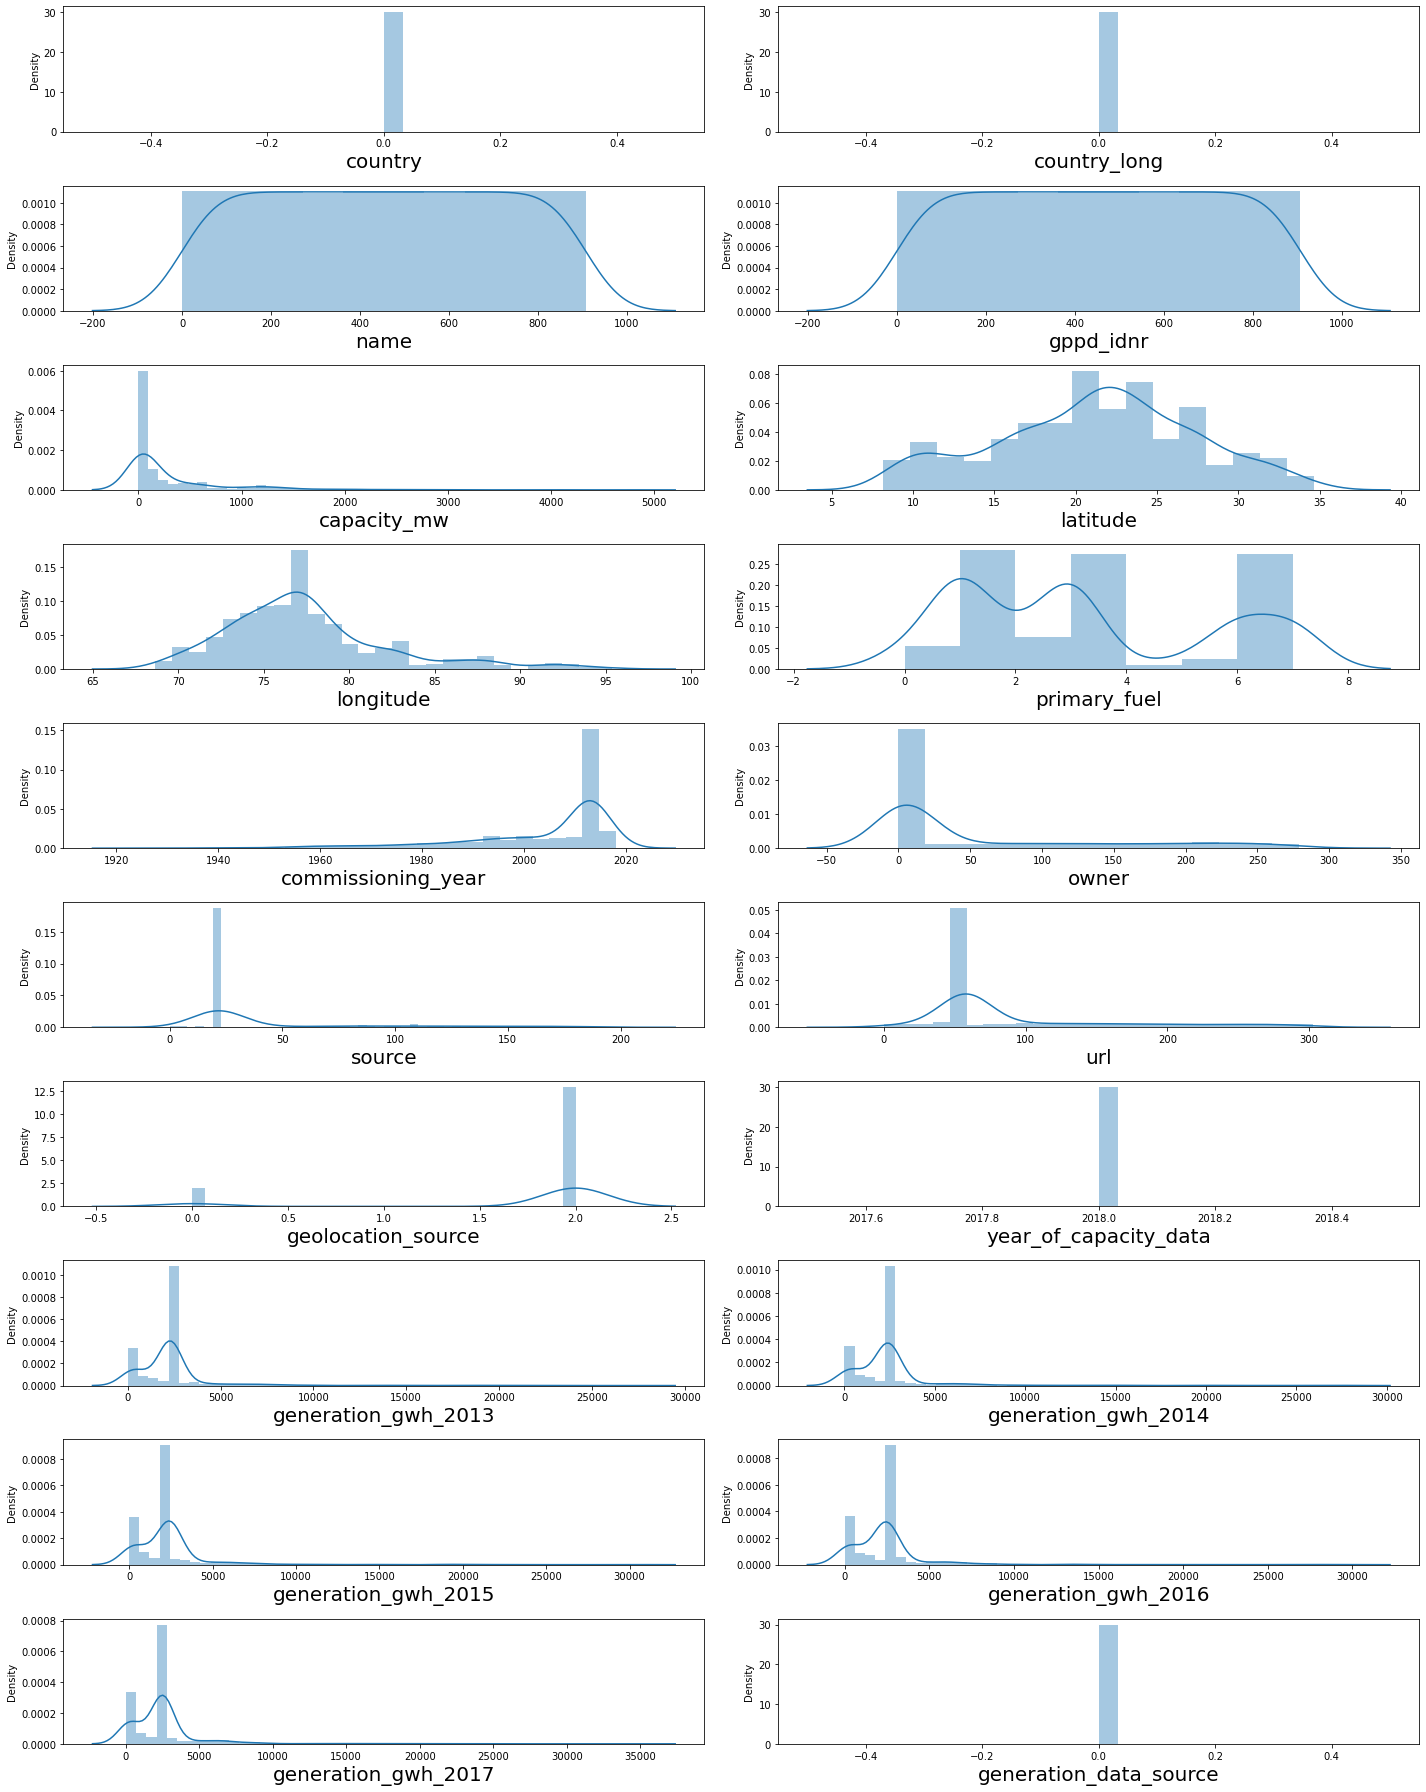

In [51]:
# lets see how data is distributed for every columns 
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(10,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1     
plt.tight_layout()  

cpacity_megawat column data right skewd ,latitude seems normal distribution , longitude slightly right skewed,commissioning_year left skwed,owner right skwed,source right skwed,url right skwed,geological source only 2 category,generation_gwh,2013,2014,2015,2016,2017 data right skwed 

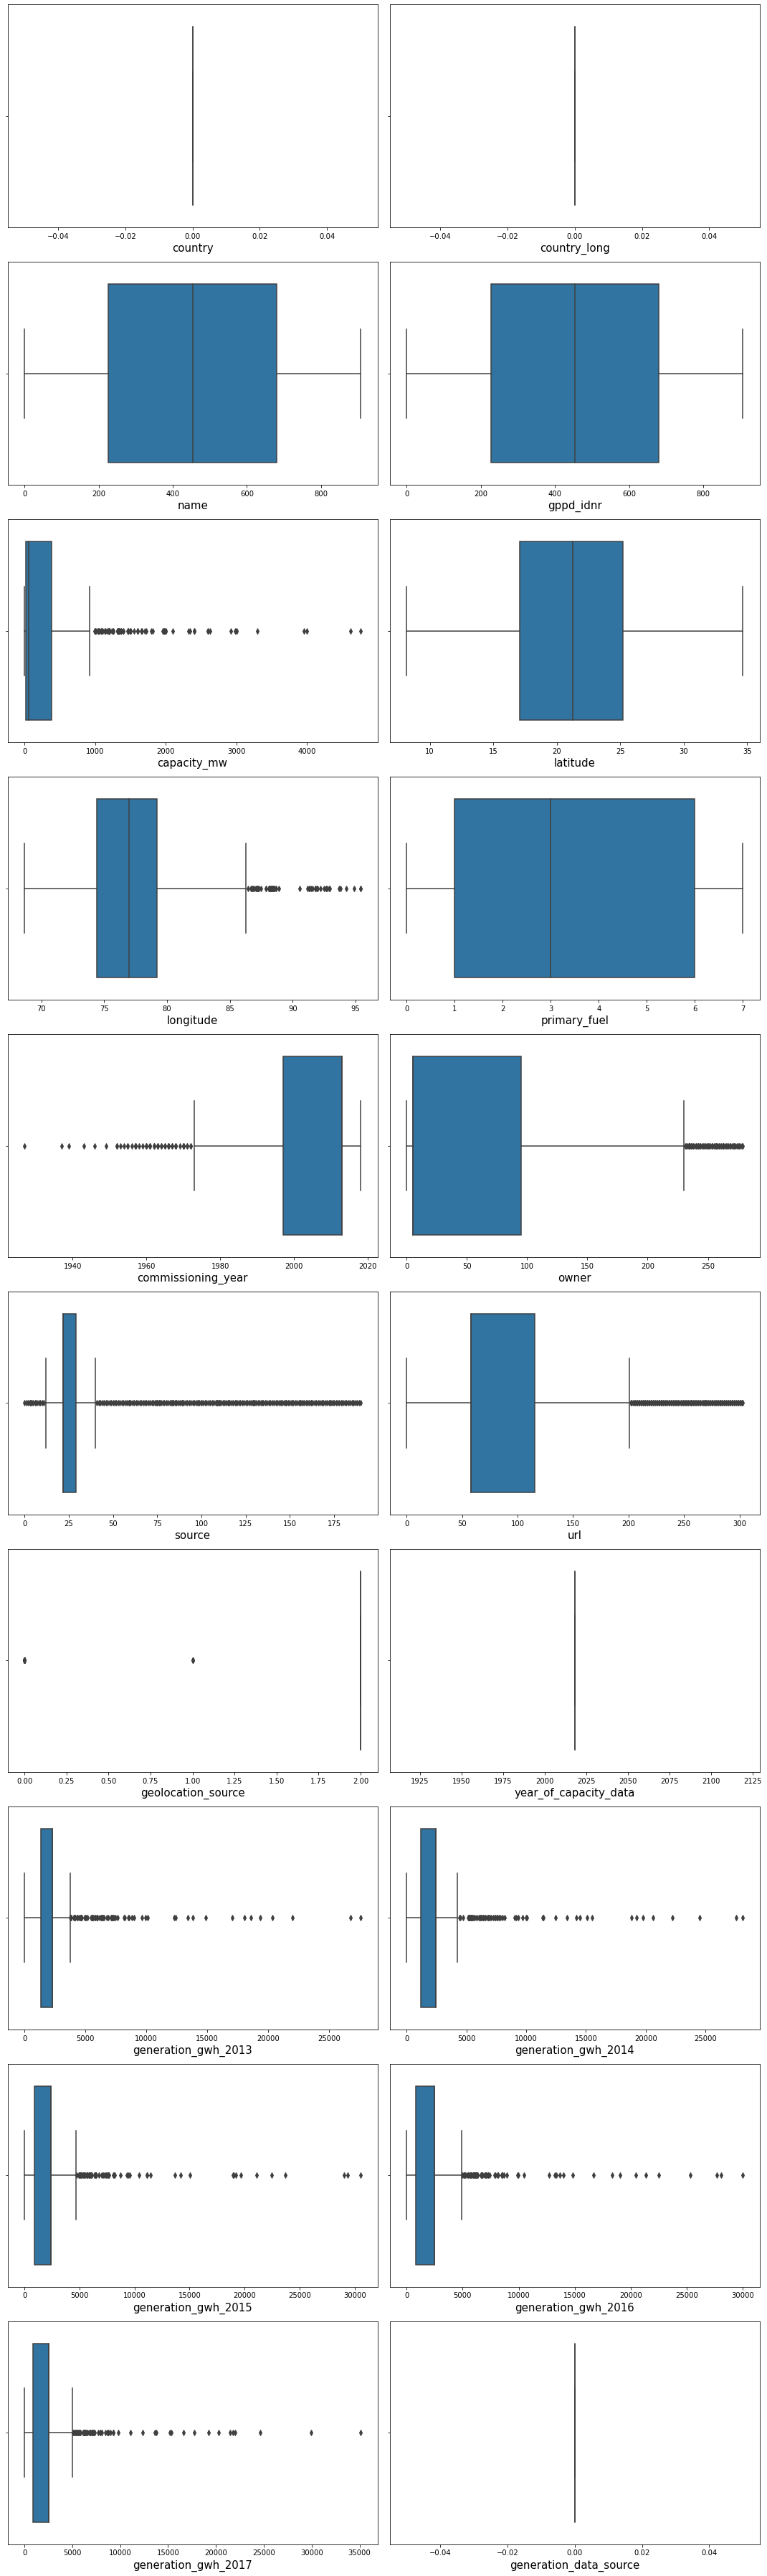

In [52]:
#Visualize the outliers using boxplot
plt.figure(figsize=(15,50))
graph=1
for column in data:
    if graph<=20:
        ax=plt.subplot(10,2,graph)
        ax=sns.boxplot(data[column],orient="v")
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.tight_layout() 

so in distpolt we see skewness of data is now same column have outliers as per boxplot ,we see substantial amount of data have outliers ,lets try to remove outliers with Z score method

In [57]:
 #first we solve classification problem later will do regression for classification our target variable is primary_fuel

In [58]:
df=data.drop("primary_fuel",axis=1) 

In [59]:
df.head(2)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0,0,0,658,2.5,28.1839,73.2407,2011.0,229,109,128,1,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
1,0,0,1,520,98.0,24.7663,74.6090,2013.0,258,174,173,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0


In [60]:
#data are left & right skewd use z score to remove outliers
from scipy import stats
import numpy as np
z=np.abs(stats.zscore(df))
z

array([[           nan,            nan, 1.73014431e+00, ...,
        1.58055100e-16, 1.55659091e-16,            nan],
       [           nan,            nan, 1.72632922e+00, ...,
        1.58055100e-16, 1.55659091e-16,            nan],
       [           nan,            nan, 1.72251413e+00, ...,
        1.58055100e-16, 1.55659091e-16,            nan],
       ...,
       [           nan,            nan, 1.72251413e+00, ...,
        1.58055100e-16, 1.55659091e-16,            nan],
       [           nan,            nan, 1.72632922e+00, ...,
        1.58055100e-16, 1.55659091e-16,            nan],
       [           nan,            nan, 1.73014431e+00, ...,
        1.58055100e-16, 1.55659091e-16,            nan]])

In [61]:
index=np.where(z>2.5)[0]

In [62]:
data=data.drop(data.index[index])
data.shape

(648, 20)

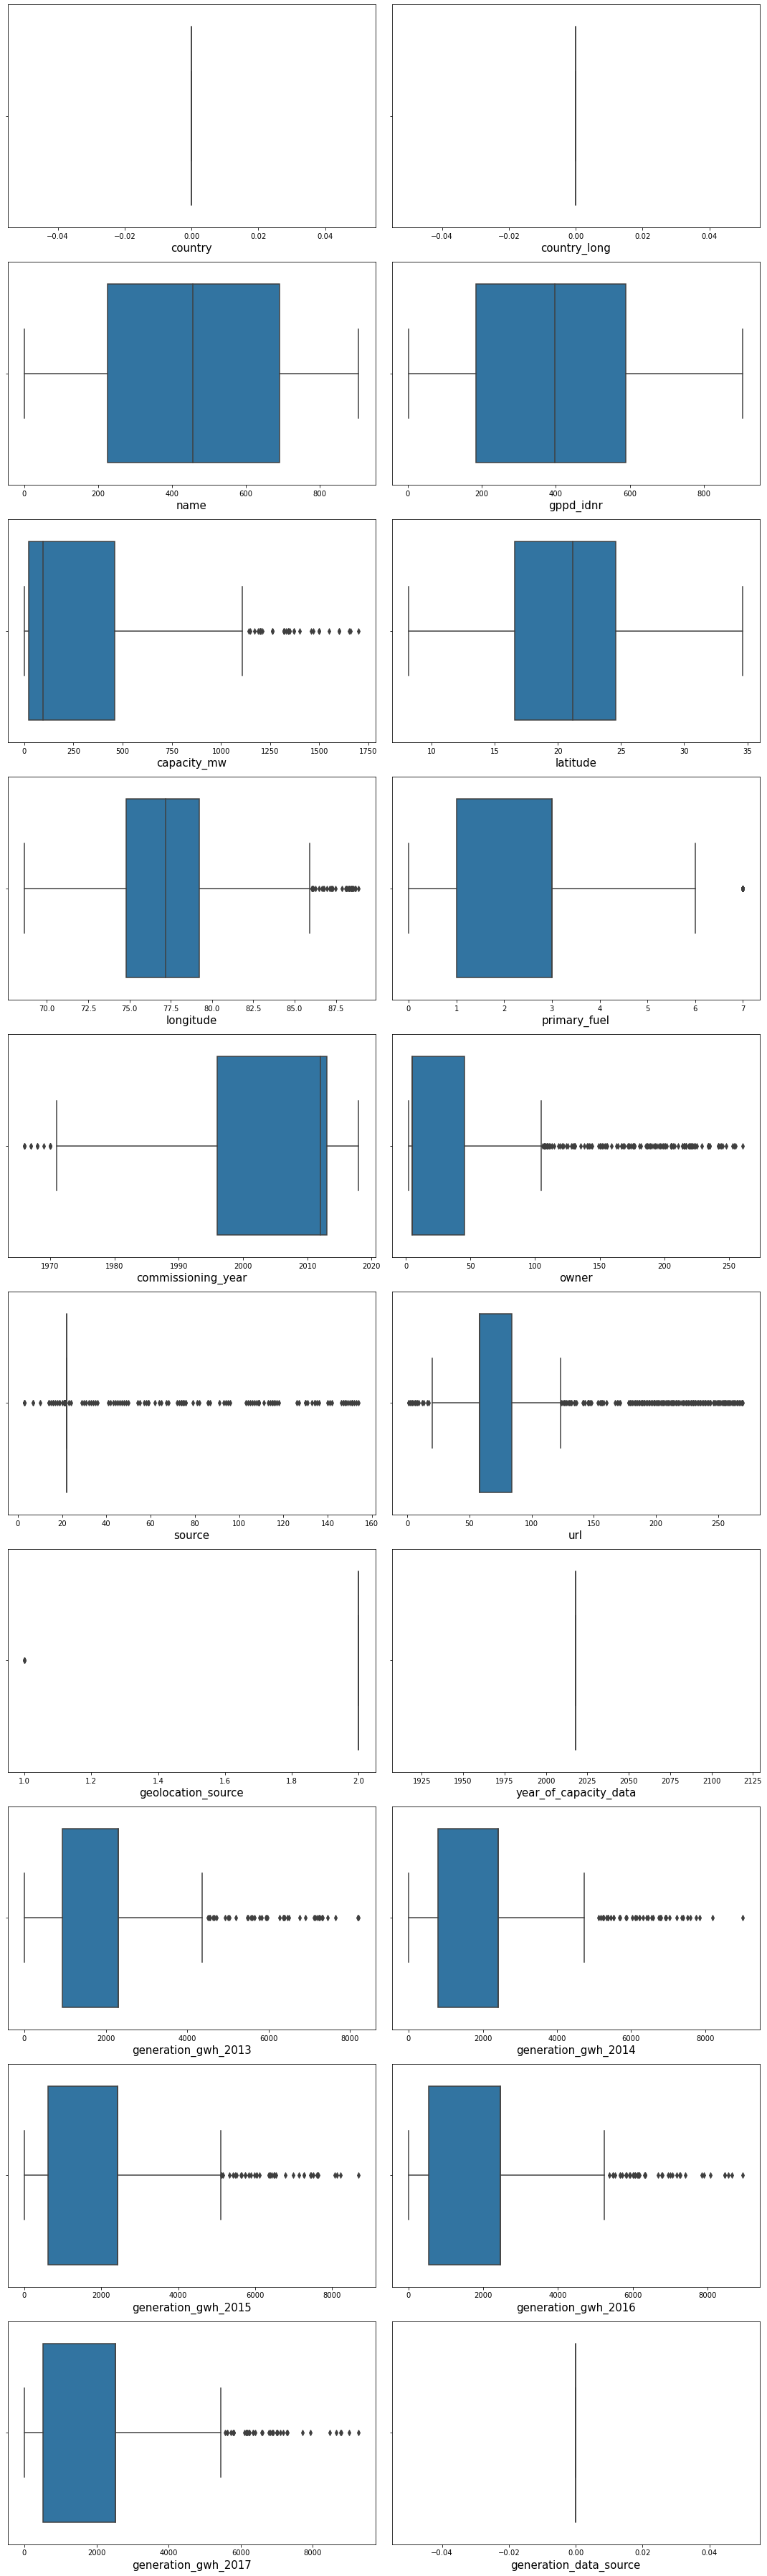

In [63]:
#Visualize the outliers using boxplot after removing treating outliers
plt.figure(figsize=(15,50))
graph=1
for column in data:
    if graph<=20:
        ax=plt.subplot(10,2,graph)
        ax=sns.boxplot(data[column],orient="v")
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.tight_layout() 

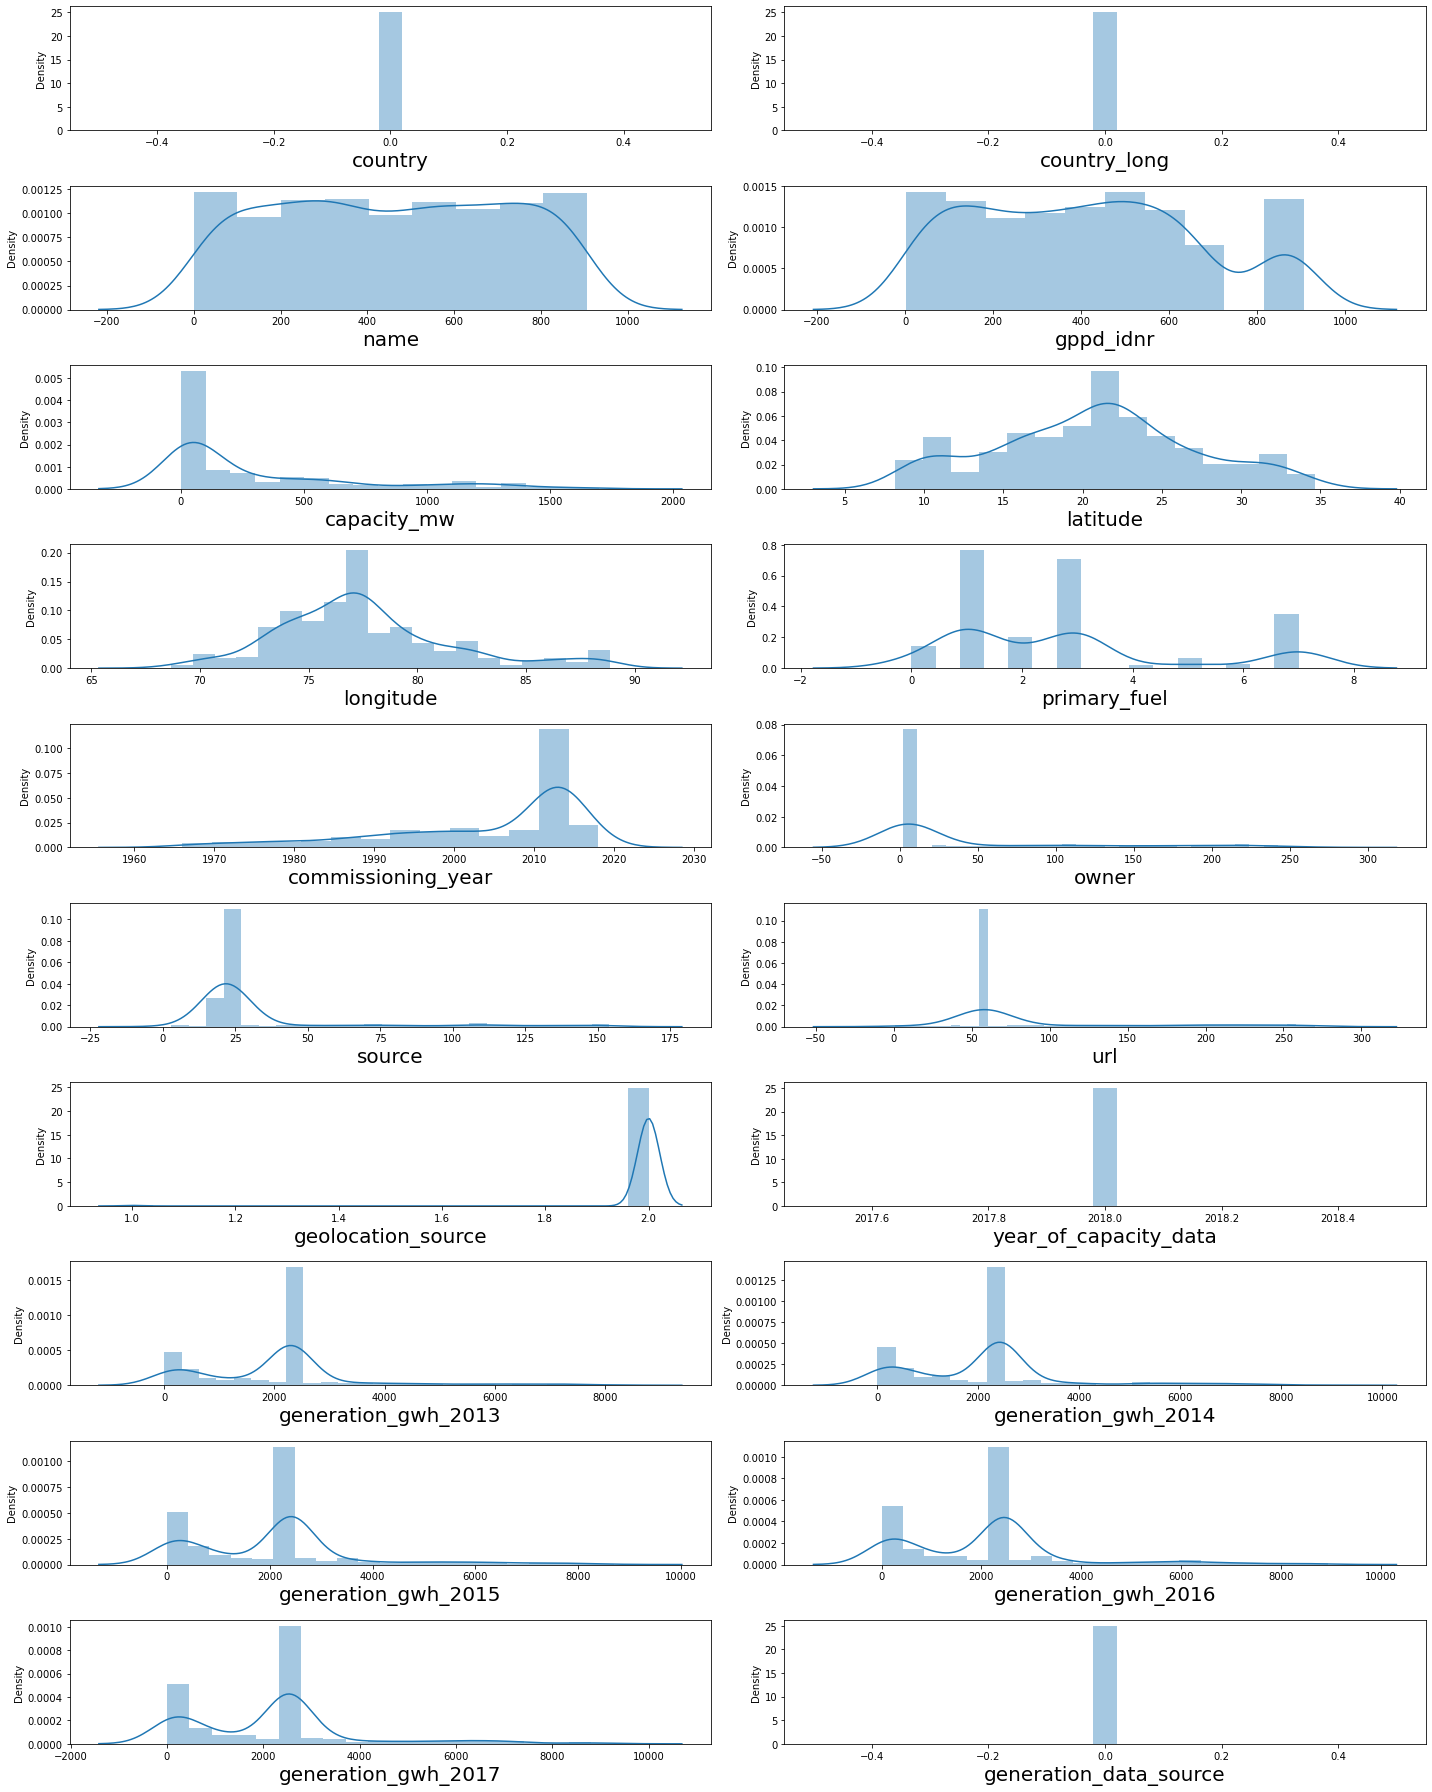

In [64]:
# lets see how data is distributed for every columns after removing outliers  
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(10,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1     
plt.tight_layout()  

In [65]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0,0,0,658,2.5,28.1839,73.2407,6,2011.0,229,109,128,1,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
2,0,0,2,854,39.2,21.9038,69.3732,7,2013.0,2,21,205,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
5,0,0,5,2,250.0,23.7689,68.6447,1,2005.0,5,22,58,2,2018.0,821.798000,1153.421000,1208.852000,1175.765000,1147.913000,0
6,0,0,6,3,60.0,10.4547,77.0078,3,1970.0,5,22,58,2,2018.0,147.568450,157.558250,152.195200,61.421350,89.629600,0
7,0,0,7,4,192.0,32.2258,77.2070,3,2010.0,5,22,58,2,2018.0,696.738800,674.391100,721.335200,675.724400,679.594950,0


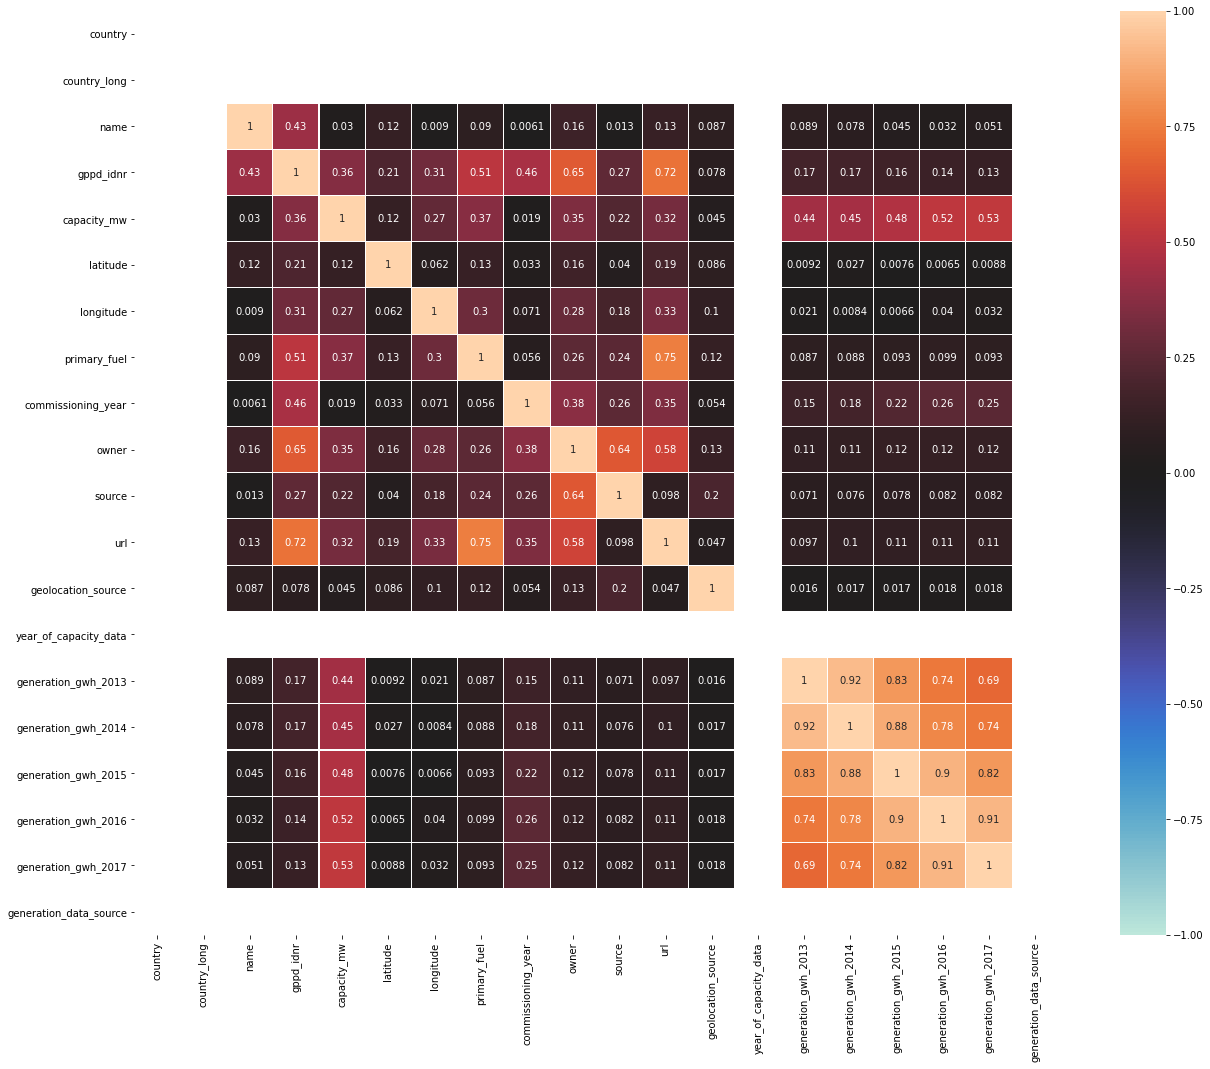

In [66]:
#lets see Plotting Heatmap(Correlation matrix) to check multicollinearity
df_corr=data.corr().abs()
plt.figure(figsize=(22,17))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.show()

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='generation_gwh_2017'>

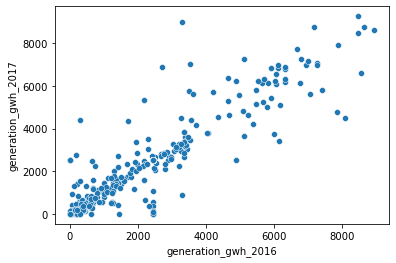

In [67]:
#generation_gwh_2017 & 16 have higher score as per heatmap lets visualize through scatter plot
sns.scatterplot(x='generation_gwh_2016',y='generation_gwh_2017',data=data)

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='generation_gwh_2016'>

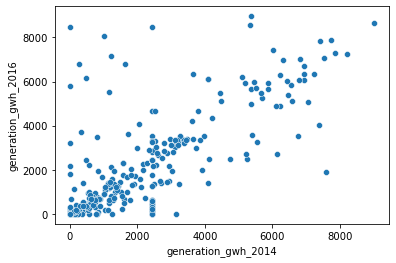

In [68]:
#generation_gwh_2014 & 16 have .78  score as per heatmap lets visualize through scatter plot
sns.scatterplot(x='generation_gwh_2014',y='generation_gwh_2016',data=data)

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='generation_gwh_2014'>

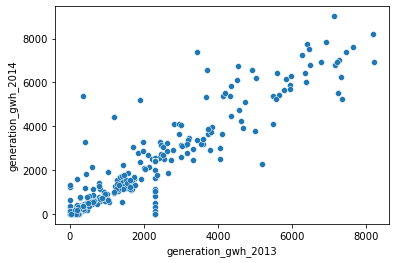

In [69]:
#generation_gwh_2013 & 14 have .92 score as per heatmap lets visualize through scatter plot
sns.scatterplot(x='generation_gwh_2013',y='generation_gwh_2014',data=data)

so asper scatter plot data are not having strong linear relationship ,multicolliniarity is nullified here

In [70]:
corr_matrix=data.corr()
corr_matrix['primary_fuel'].sort_values(ascending=False)

primary_fuel              1.000000
url                       0.754138
gppd_idnr                 0.508027
owner                     0.257224
name                      0.090063
commissioning_year        0.056137
generation_gwh_2013      -0.086608
generation_gwh_2014      -0.088117
generation_gwh_2017      -0.093118
generation_gwh_2015      -0.093386
generation_gwh_2016      -0.099033
geolocation_source       -0.118417
latitude                 -0.126366
source                   -0.244157
longitude                -0.302833
capacity_mw              -0.371916
country                        NaN
country_long                   NaN
year_of_capacity_data          NaN
generation_data_source         NaN
Name: primary_fuel, dtype: float64

country and country_long column have no significant role in our model we can drop it ,its just a name so substantial no role in our model

In [71]:
#droping country and country_long column 
data.drop(columns=['country','country_long'],axis=1)

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0,658,2.5,28.1839,73.2407,6,2011.0,229,109,128,1,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
2,2,854,39.2,21.9038,69.3732,7,2013.0,2,21,205,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
5,5,2,250.0,23.7689,68.6447,1,2005.0,5,22,58,2,2018.0,821.798000,1153.421000,1208.852000,1175.765000,1147.913000,0
6,6,3,60.0,10.4547,77.0078,3,1970.0,5,22,58,2,2018.0,147.568450,157.558250,152.195200,61.421350,89.629600,0
7,7,4,192.0,32.2258,77.2070,3,2010.0,5,22,58,2,2018.0,696.738800,674.391100,721.335200,675.724400,679.594950,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,900,492,600.0,30.1081,77.3257,1,2007.0,5,22,58,2,2018.0,3158.016000,3194.359820,3709.552200,3123.572061,3156.053669,0
902,902,493,106.6,13.1156,77.5838,5,1993.0,5,22,58,2,2018.0,20.900000,0.000000,0.000000,0.000000,2531.754458,0
903,903,494,1600.0,16.2949,77.3568,1,2016.0,5,22,58,2,2018.0,2304.059202,2420.393316,0.994875,233.596650,865.400000,0
905,905,892,25.5,15.2758,75.5811,7,2013.0,5,21,260,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0


In [72]:
#seprate featurs and label
Y=data.primary_fuel
X=data.drop(columns='primary_fuel',axis=1)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

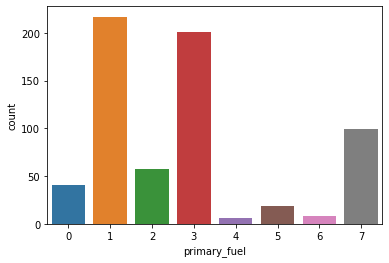

In [73]:
sns.countplot(x='primary_fuel',data=data)  #so its multiclass problem having 7 classification 

Class=6, n=8 (1.235%)
Class=7, n=99 (15.278%)
Class=1, n=217 (33.488%)
Class=3, n=201 (31.019%)
Class=2, n=57 (8.796%)
Class=0, n=41 (6.327%)
Class=5, n=19 (2.932%)
Class=4, n=6 (0.926%)


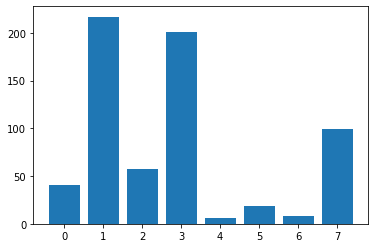

In [74]:
#visualize our target variable in terms of % 
counter = Counter(Y)
for k,v in counter.items():
    per = v / len(Y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [75]:
from imblearn.over_sampling import SMOTE

Class=6, n=217 (12.500%)
Class=7, n=217 (12.500%)
Class=1, n=217 (12.500%)
Class=3, n=217 (12.500%)
Class=2, n=217 (12.500%)
Class=0, n=217 (12.500%)
Class=5, n=217 (12.500%)
Class=4, n=217 (12.500%)


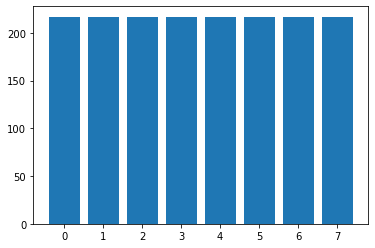

In [76]:
#resample of imbalanced dataset
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)
# summarize distribution
counter = Counter(Y)
for k,v in counter.items():
    per = v / len(Y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Now our class is balanced we will proceed for feature scaling

In [77]:
#scale feature data
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

In [78]:
#train test split 
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=.25,random_state=10)

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
#fit the training data in to decesion tree model
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [81]:
dt.score(x_train,y_train)

1.0

In [82]:
y_pred=dt.predict(x_test)

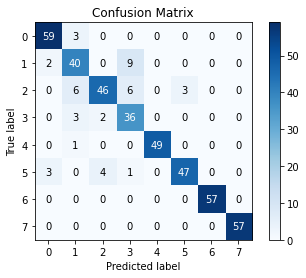

In [83]:
skplt.metrics.plot_confusion_matrix(y_pred,y_test)
plt.show()

model  seems highly overfitted we will tune the model and check cross validation

In [84]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94        62
           1       0.75      0.78      0.77        51
           2       0.88      0.75      0.81        61
           3       0.69      0.88      0.77        41
           4       1.00      0.98      0.99        50
           5       0.94      0.85      0.90        55
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00        57

    accuracy                           0.90       434
   macro avg       0.90      0.90      0.90       434
weighted avg       0.91      0.90      0.90       434



# HyperParameter Tuning of Decesion tree classificatio model

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
#lets tune three hyperparameter right now,we are pasing the diffrent values for both parameters
grid_param={'criterion':['gini','entropy'],
           'max_depth': range(2,10,3),
           'min_samples_leaf':range(1,10,2),
           'min_samples_split':range(2,10,2)}

In [87]:
#cv cross validation ,n_jobs menas apply entire CPU to do the job so that in increase process 
grid_search=GridSearchCV(estimator=dt,param_grid=grid_param,cv=5,n_jobs=-1) 

In [79]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, min_samples_leaf=5,
                                              min_samples_split=6),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [80]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 4}

In [81]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=5,min_samples_split=6)

In [82]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=6)

In [83]:
dt.score(x_train,y_train)

0.8018433179723502

Cross Validation of dt model

In [88]:
from sklearn.model_selection import KFold,cross_val_score

In [85]:
cross_val_score(dt,X_scaler,Y,cv=7).mean()

0.783410138248848

so our decesion treemodel is quite accurate as cross val score and model score is quite close
diffrence between actual and cv score =  80.18-78.34= 1.84

# LOgistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [91]:
y_pred=log_reg.predict(x_test)
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.728110599078341

AxesSubplot(0.125,0.125;0.62x0.755)


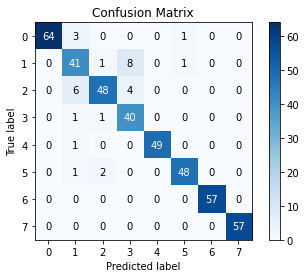

In [156]:
print(skplt.metrics.plot_confusion_matrix(y_pred,y_test))
plt.show()

In [90]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75        82
           1       0.42      0.71      0.52        31
           2       0.40      0.64      0.49        33
           3       0.56      0.51      0.53        57
           4       0.90      0.76      0.82        58
           5       0.60      0.65      0.63        46
           6       1.00      0.77      0.87        74
           7       0.93      1.00      0.96        53

    accuracy                           0.72       434
   macro avg       0.71      0.71      0.70       434
weighted avg       0.76      0.72      0.73       434



# Hyperparameter Tuning of Logisic Regression

In [92]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

In [106]:
Lr = LogisticRegression()
grid_values = {'penalty': [ 'l2'],
               'C':[0.001,.009,0.01,.09,1,5,10,25]}

In [107]:
grid_Lr = GridSearchCV(Lr, param_grid = grid_values,scoring = 'recall')
grid_Lr.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l2']},
             scoring='recall')

In [108]:
#Predict values based on new parameters
y_pred = grid_Lr.predict(x_test)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

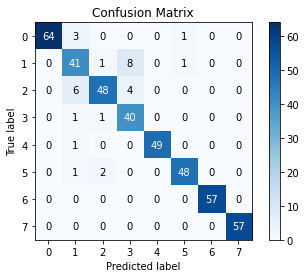

In [157]:
#New Model confusion metrics 
skplt.metrics.plot_confusion_matrix(y_pred,y_test)

In [123]:
#post tuning model classification report 
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.68      0.76        79
           1       0.45      0.65      0.53        37
           2       0.40      0.68      0.51        31
           3       0.58      0.52      0.55        58
           4       0.94      0.79      0.86        58
           5       0.58      0.66      0.62        44
           6       1.00      0.79      0.88        72
           7       0.96      1.00      0.98        55

    accuracy                           0.73       434
   macro avg       0.72      0.72      0.71       434
weighted avg       0.77      0.73      0.74       434



In [124]:
cross_val_score(Lr,X_scaler,Y,cv=5).mean()

0.7661615157838948

So score is satisfactory model performing good lets try with ensamble techniques diffrence= 73-76.6=3.6

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

In [128]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [130]:
y_pred=gbc.predict(x_test)

In [133]:
print('confusion Matrix:' + str(confusion_matrix(y_pred,y_test)))

confusion Matrix:[[64  3  0  0  0  1  0  0]
 [ 0 42  1  8  0  1  0  0]
 [ 0  6 47  4  0  2  0  0]
 [ 0  1  1 40  0  0  0  0]
 [ 0  1  0  0 49  0  0  0]
 [ 0  0  3  0  0 46  0  0]
 [ 0  0  0  0  0  0 57  0]
 [ 0  0  0  0  0  0  0 57]]


In [134]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        68
           1       0.79      0.81      0.80        52
           2       0.90      0.80      0.85        59
           3       0.77      0.95      0.85        42
           4       1.00      0.98      0.99        50
           5       0.92      0.94      0.93        49
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00        57

    accuracy                           0.93       434
   macro avg       0.92      0.93      0.92       434
weighted avg       0.93      0.93      0.93       434



# Hyperparameter Tuning of Gradient Boost model

In [136]:
param={'loss':['deviance'],
    'learning_rate':[0.1,0.001,0.01,0.3],
    'n_estimators':[100,150,200,250],
    'subsample':[1.0,2,3,4,7],
    'criterion':['friedman_mse']}

In [137]:
grid_search=GridSearchCV(estimator=gbc,param_grid=param,cv=5)

In [138]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse'],
                         'learning_rate': [0.1, 0.001, 0.01, 0.3],
                         'loss': ['deviance'],
                         'n_estimators': [100, 150, 200, 250],
                         'subsample': [1.0, 2, 3, 4, 7]})

In [139]:
grid_search.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.3,
 'loss': 'deviance',
 'n_estimators': 100,
 'subsample': 1.0}

In [142]:
gbc=GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.3,loss='deviance',n_estimators=100,subsample=1)
gbc.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.3, subsample=1)

In [143]:
y_pred=gbc.predict(x_test)

In [144]:
print('**** confusion matrix post tuning****')
print(confusion_matrix(y_test,y_pred))

**** confusion matrix post tuning****
[[64  0  0  0  0  0  0  0]
 [ 3 41  6  1  1  1  0  0]
 [ 0  1 48  1  0  2  0  0]
 [ 0  8  4 40  0  0  0  0]
 [ 0  0  0  0 49  0  0  0]
 [ 1  1  0  0  0 48  0  0]
 [ 0  0  0  0  0  0 57  0]
 [ 0  0  0  0  0  0  0 57]]


In [147]:
print('*********************Classification Report********************')
print(classification_report(y_pred,y_test))

*********************Classification Report********************
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        68
           1       0.77      0.80      0.79        51
           2       0.92      0.83      0.87        58
           3       0.77      0.95      0.85        42
           4       1.00      0.98      0.99        50
           5       0.96      0.94      0.95        51
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00        57

    accuracy                           0.93       434
   macro avg       0.93      0.93      0.93       434
weighted avg       0.94      0.93      0.93       434



Cross Validation 

In [148]:
cross_val_score(gbc,X_scaler,Y,cv=5).mean()

0.9124366491106033

model is accurate as score is 91 not overfitted  diffrence =93-91.24=1.76 

Lets plot AUC ROC score plot and chose among best model

In [94]:
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_roc_curve

In [160]:
#auc plot for decesion tree model
prob=dt.predict_proba(x_test) #calculating probabilites 

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

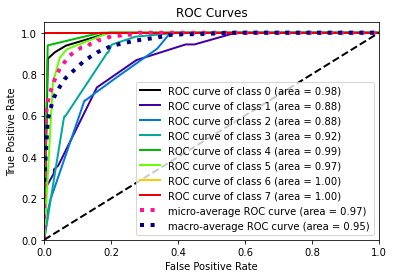

In [161]:
skplt.metrics.plot_roc(y_test,prob) 

In [163]:
#auc plot for Logistic regression tree model
prob=grid_Lr.predict_proba(x_test) #calculating probabilites 

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

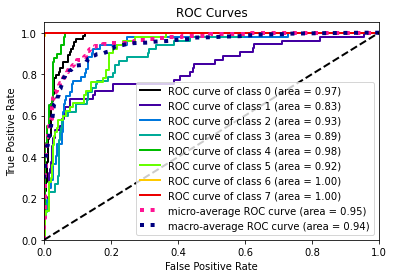

In [164]:
skplt.metrics.plot_roc(y_test,prob) 

In [167]:
#auc plot for GradientBoostingclassifier tree model
prob=gbc.predict_proba(x_test) #calculating probabilites 

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

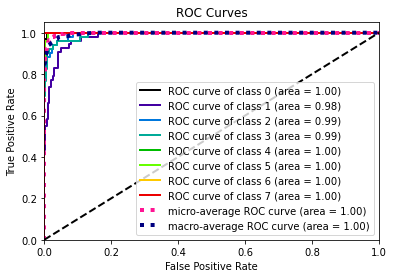

In [168]:
skplt.metrics.plot_roc(y_test,prob) 

So as per plot  and diffrence between acutal and CV score its clear that gradientboostclassifier model cover more area for each class we will save this model for use

In [169]:
#saving model GradientboostingRegression model
import pickle
file='pikle_gbr_model'
with open(file ,'wb') as file:
    pickle.dump(gbc, file) 

# 2.Prediction of capcity_mw(megawat) Regression

In [252]:
#read csv file and see top data overview to solve regression problem strating from fresh because earlier target data use as features for classification problem
power=pd.read_csv(r"C:\Users\INPshy\Desktop\DATA Science\database_IND.csv")
power.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [253]:
power.isna().sum() #like earlier data set have missing values lets fill nan

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [254]:
#drop NAN columnwhich have more than 80% value is missing
data=power.drop(columns=['estimated_generation_gwh','wepp_id','other_fuel3','other_fuel2','other_fuel1'],axis=1)

In [255]:
#so now first treat all nan values 
data['latitude']=data['latitude'].fillna(data['latitude'].mean())
data['longitude']=data['longitude'].fillna(data['longitude'].mean())
data['commissioning_year']=data['commissioning_year'].fillna(data['commissioning_year'].mode()[0])
data['owner']=data['owner'].fillna(data['owner'].mode()[0])
data['geolocation_source']=data['geolocation_source'].fillna(data['geolocation_source'].mode()[0])
data['year_of_capacity_data']=data['year_of_capacity_data'].fillna(data['year_of_capacity_data'].mode()[0])
data['generation_gwh_2013']=data['generation_gwh_2013'].fillna(data['generation_gwh_2013'].mean())
data['generation_gwh_2014']=data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].mean())
data['generation_gwh_2015']=data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].mean())
data['generation_gwh_2016']=data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].mean())
data['generation_gwh_2017']=data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].mean())
data['generation_data_source']=data['generation_data_source'].fillna(data['generation_data_source'].mode()[0])

In [256]:
data.head(2)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,2013.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority


In [257]:
#encoding object into numerical data
from sklearn.preprocessing import LabelEncoder

In [258]:
label=LabelEncoder()
for i in data.columns:
    if data[i].dtype=="object":
        data[i]=label.fit_transform(data[i])

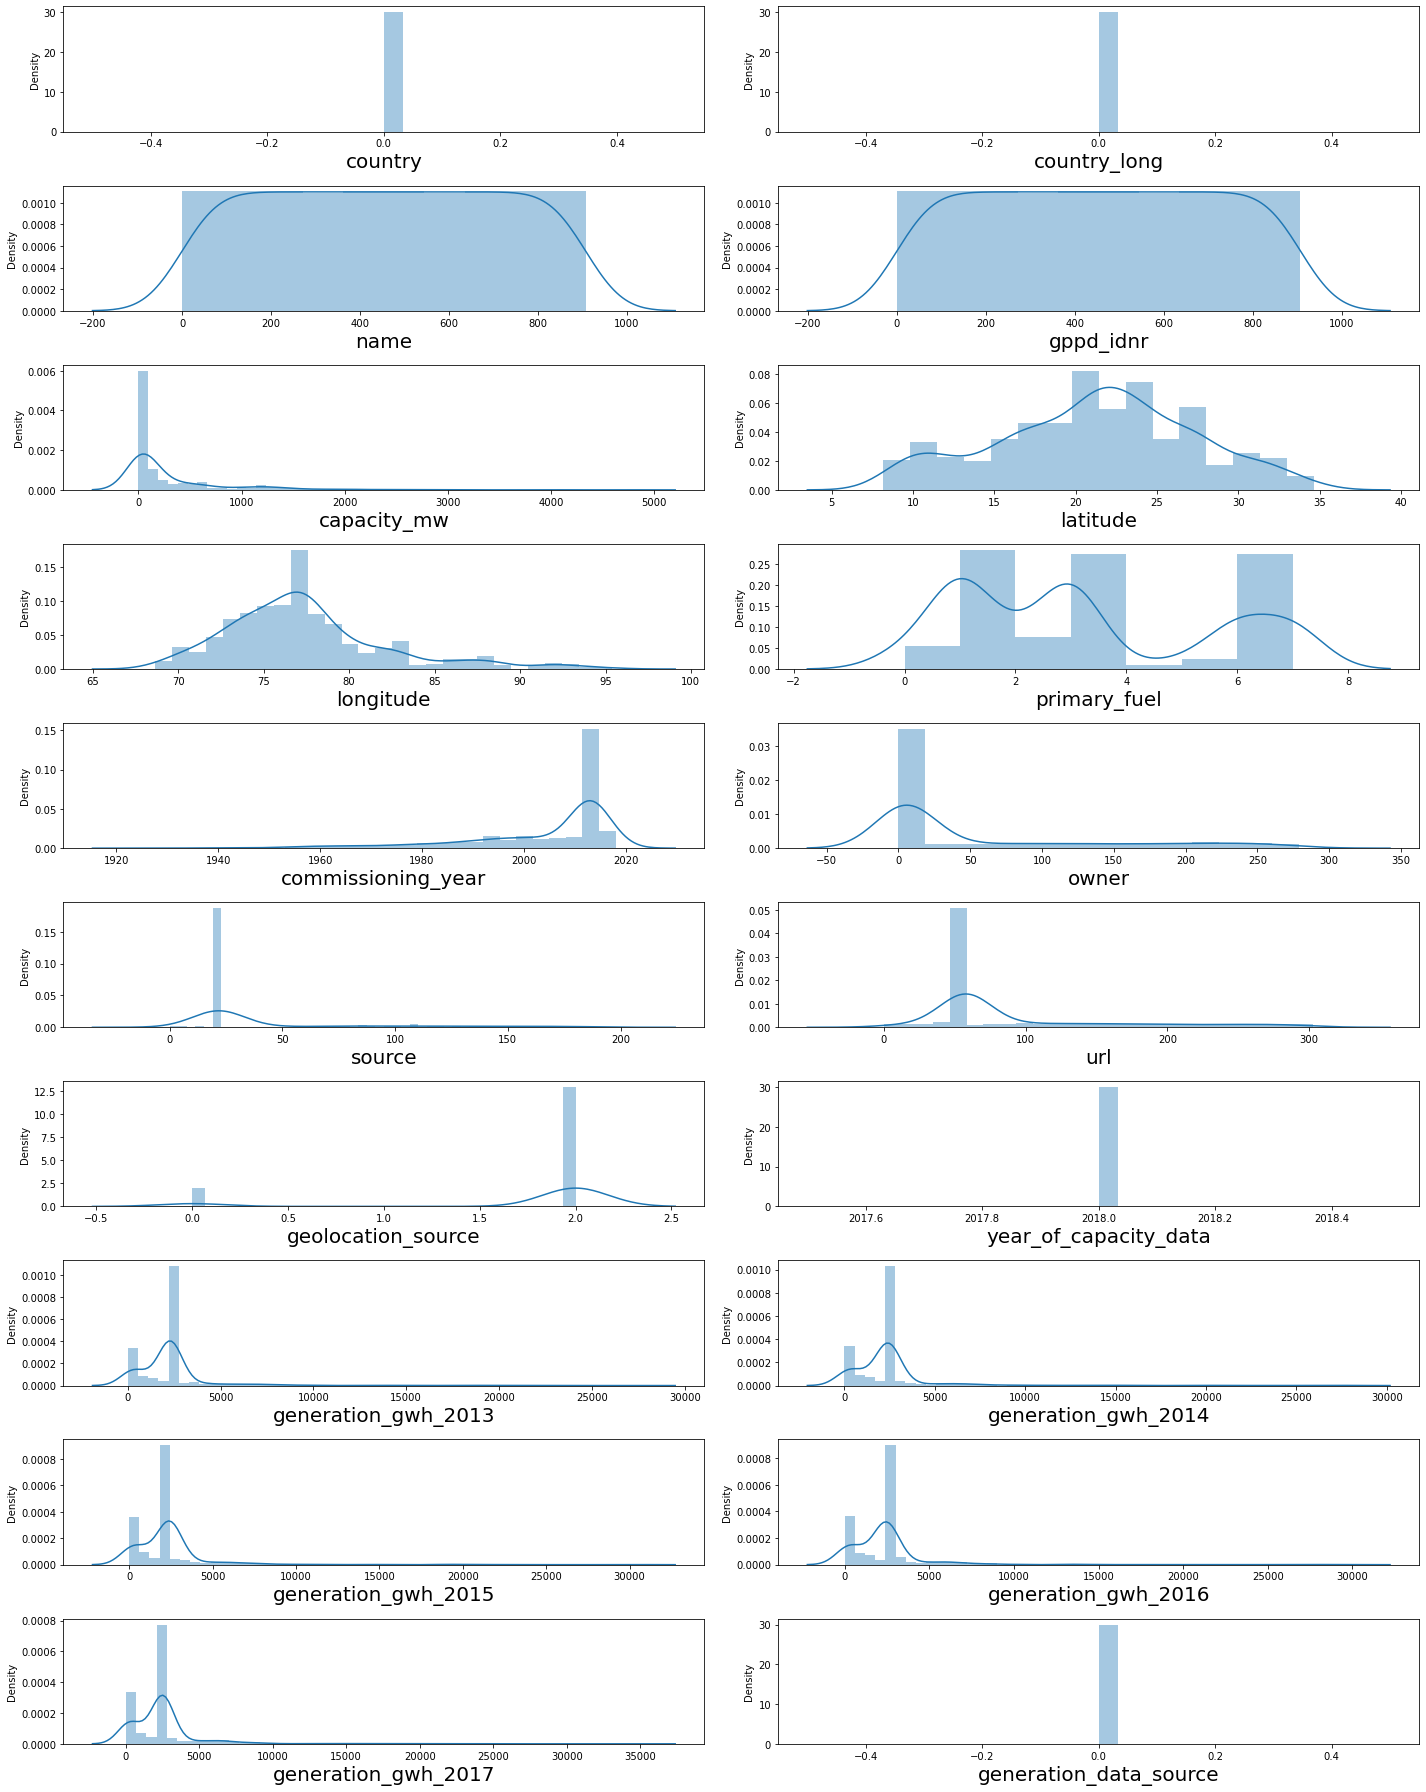

In [259]:
# lets see how data is distributed for every columns 
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(10,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1     
plt.tight_layout()  

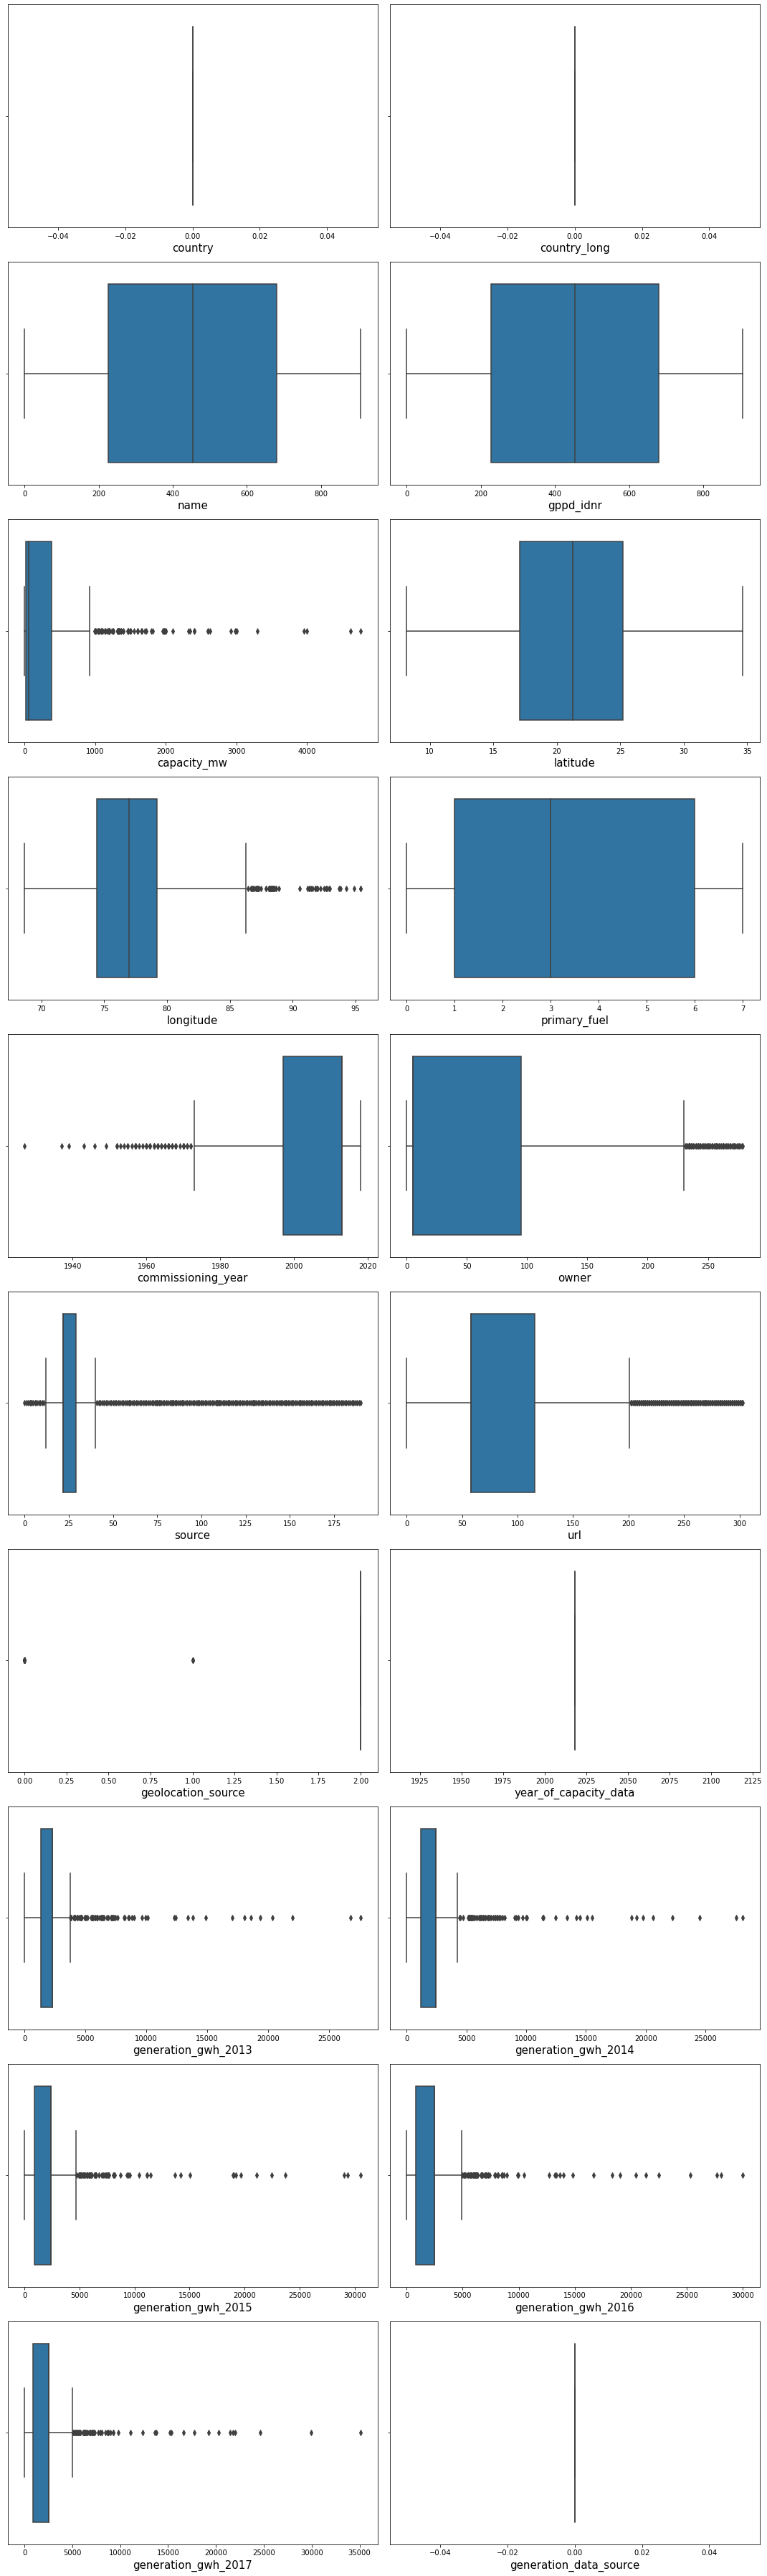

In [260]:
#Visualize the outliers using boxplot
plt.figure(figsize=(15,50))
graph=1
for column in data:
    if graph<=20:
        ax=plt.subplot(10,2,graph)
        ax=sns.boxplot(data[column],orient="v")
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.tight_layout() 

so in distpolt we see skewness of data is now same column have outliers as per boxplot ,we see substantial amount of data have outliers ,lets try to remove outliers with Z score method

In [261]:
df=data.drop("capacity_mw",axis=1) #drop our target variable in regression model

In [262]:
df.head(2)

,country,country_long,name,gppd_idnr,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0,0,0,658,28.1839,73.2407,6,2011.0,229,109,128,1,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
1,0,0,1,520,24.7663,74.6090,1,2013.0,258,174,173,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0


In [263]:
#data are left & right skewd use z score to remove outliers
from scipy import stats
import numpy as np
z=np.abs(stats.zscore(df))
z

array([[           nan,            nan, 1.73014431e+00, ...,
        1.58055100e-16, 1.55659091e-16,            nan],
       [           nan,            nan, 1.72632922e+00, ...,
        1.58055100e-16, 1.55659091e-16,            nan],
       [           nan,            nan, 1.72251413e+00, ...,
        1.58055100e-16, 1.55659091e-16,            nan],
       ...,
       [           nan,            nan, 1.72251413e+00, ...,
        1.58055100e-16, 1.55659091e-16,            nan],
       [           nan,            nan, 1.72632922e+00, ...,
        1.58055100e-16, 1.55659091e-16,            nan],
       [           nan,            nan, 1.73014431e+00, ...,
        1.58055100e-16, 1.55659091e-16,            nan]])

In [264]:
index=np.where(z>2.5)[0]

In [265]:
data=data.drop(data.index[index])
data.shape

(659, 20)

In [266]:
#droping country and country_long column as no significant in model 
data.drop(columns=['country','country_long'],axis=1)

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0,658,2.5,28.1839,73.2407,6,2011.0,229,109,128,1,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
2,2,854,39.2,21.9038,69.3732,7,2013.0,2,21,205,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
4,4,1,1800.0,21.9603,82.4091,1,2015.0,5,22,58,2,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0
5,5,2,250.0,23.7689,68.6447,1,2005.0,5,22,58,2,2018.0,821.798000,1153.421000,1208.852000,1175.765000,1147.913000,0
6,6,3,60.0,10.4547,77.0078,3,1970.0,5,22,58,2,2018.0,147.568450,157.558250,152.195200,61.421350,89.629600,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,900,492,600.0,30.1081,77.3257,1,2007.0,5,22,58,2,2018.0,3158.016000,3194.359820,3709.552200,3123.572061,3156.053669,0
902,902,493,106.6,13.1156,77.5838,5,1993.0,5,22,58,2,2018.0,20.900000,0.000000,0.000000,0.000000,2531.754458,0
903,903,494,1600.0,16.2949,77.3568,1,2016.0,5,22,58,2,2018.0,2304.059202,2420.393316,0.994875,233.596650,865.400000,0
905,905,892,25.5,15.2758,75.5811,7,2013.0,5,21,260,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0


In [267]:
#seprate featurs and class to build regression model 
Y=data.capacity_mw
X=data.drop(columns='capacity_mw',axis=1)

In [268]:
#scale feature data
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

In [269]:
#train test split data
x_train,x_test,y_train,y_test=train_test_split(X_scaler,Y,test_size=.25,random_state=10)

In [270]:
#import linear regression to build model
from sklearn.linear_model import LinearRegression

In [271]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [272]:
lr.score(x_train,y_train)

0.6225446445099032

In [273]:
y_pred=lr.predict(x_test)
mean_absolute_error(y_pred,y_test)

205.60152597481581

# Hyperparamter Tuning of LR model

In [274]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

In [275]:
lassocv=LassoCV(alphas=None, max_iter=100,normalize=True)
lassocv.fit(x_train,y_train) 

LassoCV(max_iter=100, normalize=True)

In [276]:
alpha=lassocv.alpha_
alpha

0.5016120733224738

In [277]:
#now with Lasso regression lets see how our data is fitted 
lasso_reg=Lasso(alpha=alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.5016120733224738)

In [278]:
lasso_reg.score(x_train,y_train)

0.6224661683810144

In [279]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [280]:
ridgecv.alpha_

0.040999999999999995

In [281]:
ridge_l1=Ridge(alpha=ridgecv.alpha_)
ridge_l1.fit(x_train,y_train)

Ridge(alpha=0.040999999999999995)

In [282]:
ridge_l1.score(x_test,y_test)

0.4770468512135526

cross validation of model

In [283]:
cross_val_score(ridge_l1,X_scaler,Y,cv=5).mean()

0.5516001937339597

as  per score ridge_l1 model is underfitted 

In [284]:
cross_val_score(lasso_reg,X_scaler,Y,cv=5).mean()

0.5537506890275975

lasso_reg score show model is slightly overfiited 

In [285]:
#model building with Decesion tree 
from sklearn.tree import DecisionTreeRegressor

In [286]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [287]:
dt.score(x_test,y_test)

0.5382768878054431

# Hyperparamter tuning ofDecesion Tree model

In [288]:
from sklearn.model_selection import GridSearchCV

In [289]:
parametrs={'criterion':['mse'],
    'max_depth':range(1,20,2),
    'min_samples_split':range(2,16, 2),
    'min_samples_leaf':range(1,10,1),
    'min_weight_fraction_leaf':[0.01,0.02,0.1,1]}

In [290]:
grid_search=GridSearchCV(estimator=dt,param_grid=parametrs,cv=5)

In [291]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': range(1, 20, 2),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 16, 2),
                         'min_weight_fraction_leaf': [0.01, 0.02, 0.1, 1]})

In [295]:
grid_search.best_params_

{'criterion': 'mse',
 'max_depth': 11,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.01}

In [296]:
dt=DecisionTreeRegressor(criterion='mse',
                         max_depth=11,min_samples_leaf=2,min_samples_split=10,min_weight_fraction_leaf=0.01)

In [297]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=11, min_samples_leaf=2, min_samples_split=10,
                      min_weight_fraction_leaf=0.01)

In [298]:
dt.score(x_train,y_train)

0.9160304621049774

In [299]:
y_pred=dt.predict(x_test)

In [300]:
print('**** accuracy post tuning****')
print(r2_score(y_test,y_pred))   

**** accuracy post tuning****
0.6285341316960196


so my decesion tree model after tuning accuracy is 63% 

Cross validation of decesion tree model

In [301]:
cross_val_score(dt,X_scaler,Y,cv=7).mean()

0.632347605567164

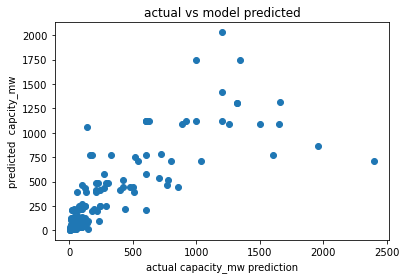

In [302]:
#Visualization of actual vs predicted capacity_mw
plt.scatter(y_test,y_pred)
plt.xlabel('actual capacity_mw prediction')
plt.ylabel('predicted  capcity_mw')
plt.title('actual vs model predicted')
plt.show()

so model is overfitted as per cv score=.648,and accuracy =.63,of model is low ,i will try to build model with other method 

# XGB model

In [303]:
import xgboost as xgb
xgb=xgb.XGBRegressor()

In [172]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [175]:
y_pred=xgb.predict(x_test)
print(r2_score(y_test,y_pred))

0.6966654915761572


# Hyperparameter Tuning

In [176]:
grid_param={ 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2),
 'gamma':range(0,5,1),
'learning_rate':[0.01,0.02,.2,.3,.1]
}

In [177]:
grid_search=GridSearchCV(xgb,param_grid=grid_param,cv=5)

In [178]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [179]:
grid_search.best_params_

{'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 3}

In [180]:
grid_search.best_score_

0.7552938310063066

cross validation score of XGB model

In [181]:
cross_val_score(xgb,X_scaler,Y,cv=5).mean()

0.7095200808521263

# GradientBoost Regression model

In [304]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

In [305]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [306]:
#check model score
gbr.score(x_train,y_train)

0.963464383481954

model score is high lets tune the model with GridsearchCV and  cross check of model accuracy

Hyperparameter Tuning of Gradientboosting reg model

In [307]:
param={'loss':['ls'],
    'learning_rate':[0.1,0.2,0.3,0.4],
    'n_estimators':[100,150,200,250],
    'subsample':[1.0,2,3,4,7],
    'criterion':['friedman_mse']}

In [308]:
grid_search=GridSearchCV(estimator=gbr,param_grid=param,cv=5)

In [309]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse'],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4], 'loss': ['ls'],
                         'n_estimators': [100, 150, 200, 250],
                         'subsample': [1.0, 2, 3, 4, 7]})

In [310]:
grid_search.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'ls',
 'n_estimators': 100,
 'subsample': 1.0}

In [311]:
gbr=GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.1, loss='ls',n_estimators=100,subsample=1)

In [312]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor(subsample=1)

In [313]:
gbr.score(x_train,y_train)

0.963464383481954

In [316]:
y_pred=gbr.predict(x_train)

Cross validation of Gradientboosting Regression model

In [337]:
cross_val_score(gbr,X_scaler,Y,cv=5).mean()

0.7249082548194113

# RandomForest Regression model

In [321]:
#RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [322]:
y_pred=rfr.predict(x_test)

In [323]:
rfr.score(x_train,y_train)

0.9706909094619253

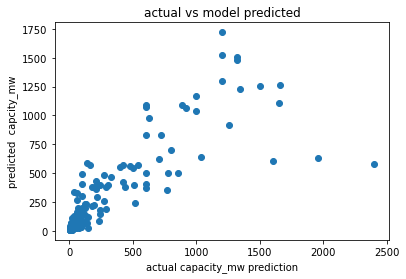

In [324]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual capacity_mw prediction')
plt.ylabel('predicted  capcity_mw')
plt.title('actual vs model predicted')
plt.show()

Hyperparameter Tuning of RandomForestRegression model

In [325]:
param_grid = {  'bootstrap': [True],
              'max_depth': [5, 10, 15], 
              'max_features': ['auto', 'log2'], 
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [326]:
 regr = RandomForestRegressor(max_depth=16, random_state=0,
                              n_estimators=100)

In [327]:
regr.fit(x_train,y_train)

RandomForestRegressor(max_depth=16, random_state=0)

In [328]:
grid_search=GridSearchCV(estimator=regr,param_grid=param_grid,cv=3)

In [329]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(max_depth=16, random_state=0),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]})

In [330]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 'auto',
 'n_estimators': 15}

In [331]:
regr=RandomForestRegressor(bootstrap=True,max_depth=15,max_features='auto',n_estimators=15)

In [332]:
regr.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, n_estimators=15)

In [333]:
regr.score(x_train,y_train)

0.9598744895082785

In [334]:
y_pred=regr.predict(x_test)

cross Validation of RandomForestModel

In [335]:
cross_val_score(regr,X_scaler,Y,cv=5).mean()

0.7326631049568306

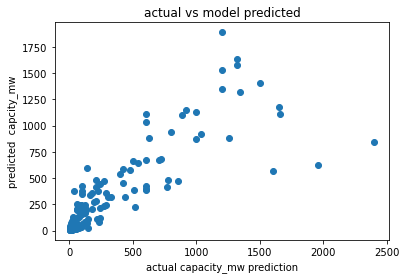

In [336]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual capacity_mw prediction')
plt.ylabel('predicted  capcity_mw')
plt.title('actual vs model predicted')
plt.show()

In [338]:
print('**** accuracy post tuning****')
print(r2_score(y_test,y_pred))   

**** accuracy post tuning****
0.7064004032247997


so my RandomForestRegression model accuracy score is 70% means our model performence accurate 70%

CV Score ,R2 score and model score of RandomForest Regression model is highest among all model so i will save this model for further use

In [339]:
#saving model 
import pickle
filename='finalized_model.pickel'
pickle.dump(regr, open(filename,'wb'))